In [1]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

# import package
import teetool as tt

/home/will/anaconda3/envs/tt/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# generate trajectory data

cluster_data_1 = tt.helpers.get_trajectories(ntype=0,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

cluster_data_2 = tt.helpers.get_trajectories(ntype=1,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

In [3]:
# create a world
world = tt.World(name="toy", ndim=2, resolution=[100, 100])

# add data
world.addCluster(cluster_data_1, "one")
world.addCluster(cluster_data_2, "two")

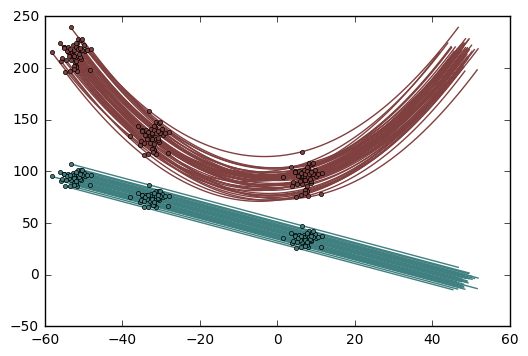

In [14]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
% matplotlib inline

# visual
visual = tt.visual_2d.Visual_2d(world)

# plot 50 trajectories
visual.plotTrajectories(ntraj=50)

# plot points along line
visual.plotTrajectoriesPoints(x1=0.0, ntraj=50, marker='o', markersize=3)
visual.plotTrajectoriesPoints(x1=0.2, ntraj=50, marker='o', markersize=3)
visual.plotTrajectoriesPoints(x1=0.6, ntraj=50, marker='o', markersize=3)

# obtain limits
xlim = visual._ax.get_xlim()
ylim = visual._ax.get_ylim()

# show
visual.show()

In [11]:
# build the model

settings = {"model_type":"resampling",
            "ngaus":100}

world.buildModel(settings)

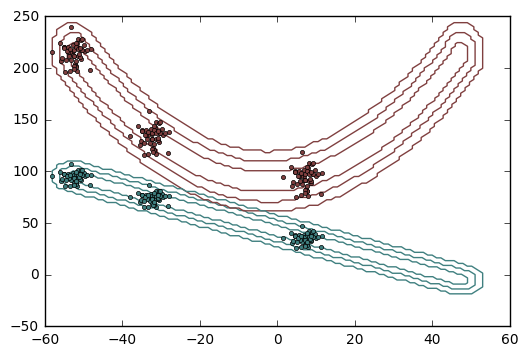

In [15]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
% matplotlib inline

# visual
visual = tt.visual_2d.Visual_2d(world)

# add confidence region(s)
visual.plotTube(sdwidth=1)
visual.plotTube(sdwidth=2)
visual.plotTube(sdwidth=3)

# plot points along line
visual.plotTrajectoriesPoints(x1=0.0, ntraj=50, marker='o', markersize=3)
visual.plotTrajectoriesPoints(x1=0.2, ntraj=50, marker='o', markersize=3)
visual.plotTrajectoriesPoints(x1=0.6, ntraj=50, marker='o', markersize=3)

# set limits
visual._ax.set_xlim(xlim)
visual._ax.set_ylim(ylim)

# show
visual.show()